$
\Huge Name-S.P.Prathapasinghe
$
<br>
$
Index No.-190470X
$
<br>
$
Github Link-https://github.com/PrathapasingheSP99/Image-Processing.git
$

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

$
\Huge Q1
$

(-0.5, 719.5, 809.5, -0.5)

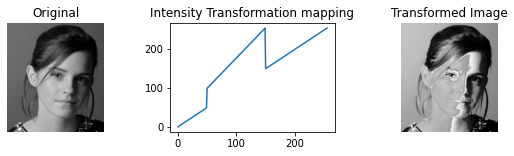

In [2]:
image=cv.imread('emma_gray.jpg',cv.IMREAD_GRAYSCALE)
map1=np.linspace(0,50,50)
map2=np.linspace(100,255,100)
map3=np.linspace(150,255,106)
full_map=np.concatenate((map1,map2,map3),axis=0).astype(np.uint8)
transformed=full_map[image]
fig,ax=plt.subplots(1,3,figsize=(10,2))
ax[0].imshow(cv.cvtColor(image,cv.COLOR_BGR2RGB))
ax[1].plot(full_map)
ax[2].imshow(cv.cvtColor(transformed,cv.COLOR_BGR2RGB))
title1='Original'
title2='Intensity Transformation mapping'
title3='Transformed Image'
ax[0].set_title(title1)
ax[1].set_title(title2)
ax[2].set_title(title3)
ax[0].axis('off')
ax[2].axis('off')

Pixels in intensity level 50-150 are mapped to a higher intensity.The lower and upper pixel intensity ranges are mapped into the same value.

$
\Huge Q2
$

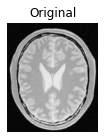

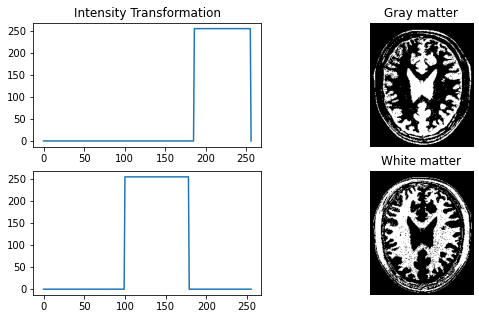

In [3]:
brain=cv.imread('brain_proton_density_slice.png',cv.IMREAD_GRAYSCALE)
fig,ax=plt.subplots(1,1,figsize=(3,2))
ax.imshow(cv.cvtColor(brain,cv.COLOR_BGR2RGB))
Text='Original'
ax.set_title(Text)
ax.axis('off')
fig,ax=plt.subplots(2,2,figsize=(9,5))
Threshold=186
map1=np.linspace(0,0,Threshold)
map2=np.linspace(255,255,256-Threshold)
map3=np.linspace(0,0,1)
full_map=np.concatenate((map1,map2,map3),axis=0).astype(np.uint8)
Gray_matter=full_map[brain]
ax[0][0].plot(full_map)
ax[0][1].imshow(cv.cvtColor(Gray_matter,cv.COLOR_BGR2RGB))
Text1='Intensity Transformation'
Text2='Gray matter'
Text3='White matter'
ax[0][0].set_title(Text1)
ax[0][1].set_title(Text2)
Threshold1=100
Threshold2=77
map_1=np.linspace(0,0,Threshold1)
map_2=np.linspace(255,255,256-Threshold1-Threshold2)
map_3=np.linspace(0,0,Threshold2)
full_map_new=np.concatenate((map_1,map_2,map_3),axis=0).astype(np.uint8)
White_matter=full_map_new[brain]
ax[1][0].plot(full_map_new)
ax[1][1].imshow(cv.cvtColor(White_matter,cv.COLOR_BGR2RGB))
ax[1][1].set_title(Text3)
for i in range(2):
    ax[i][1].axis('off')        

We can use intensity transformation method to highlight the important parts of the image we are examining.In the gray matter we have to filter out the white color parts and light gray parts of the brain image. We use a high pass filter to above task. We have to adjust the threshold value according to the color amount.
In the white matter image we have to filter out dark gray parts only.So we use a band pass filter.

$
\Huge Q3
$

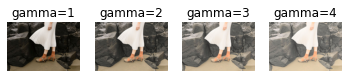

In [4]:
gamma=2
def Gamma_correct(gamma):
    Rocks=cv.imread("highlights_and_shadows.jpg")
    Lab=cv.cvtColor(Rocks,cv.COLOR_BGR2Lab)
    Lab[:,:,0]=(Lab[:,:,0]/255)**(1/gamma)*255
    return Lab
fig,ax=plt.subplots(1,4,figsize=(6,2))
t00='gamma=1'
t10='gamma=2'
t01='gamma=3'
t11='gamma=4'
ax[0].imshow(cv.cvtColor(Gamma_correct(1),cv.COLOR_Lab2RGB))
ax[1].imshow(cv.cvtColor(Gamma_correct(2),cv.COLOR_Lab2RGB))
ax[2].imshow(cv.cvtColor(Gamma_correct(3),cv.COLOR_Lab2RGB))
ax[3].imshow(cv.cvtColor(Gamma_correct(4),cv.COLOR_Lab2RGB))
ax[0].set_title(t00)
ax[1].set_title(t10)
ax[2].set_title(t01)
ax[3].set_title(t11)
for p in range(4):
    ax[p].axis('off')

CIELAB color space is a color model like RGB or CMYK. 'L' in 'Lab' color model represent  perceptual lightness. 'a' and 'b' represent four unique colors of human vision: red, green, blue, and yellow. Here we convert the BGR image into Lab model and apply gamma correction to 'L' value.By changing the gamma value we can change the brightness of the image.

$
\Huge Q4
$

Text(0.5, 1.0, 'Equalized image')

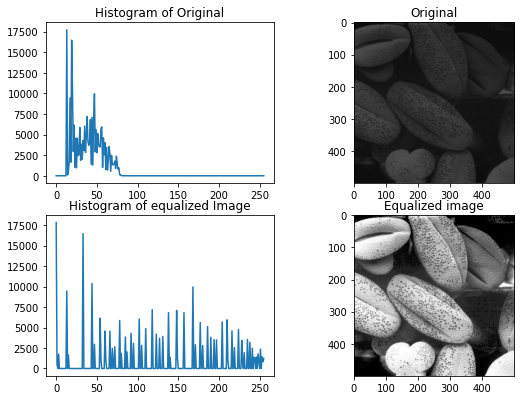

In [5]:
shells=cv.imread('shells.png',cv.IMREAD_GRAYSCALE)
assert shells is not None
hist_shells=cv.calcHist([shells],[0],None,[256],[0,256])
shells_equalized=cv.equalizeHist(shells)
hist_shells_equalized=cv.calcHist([shells_equalized],[0],None,[256],[0,256])
fig,ax=plt.subplots(2,2,figsize=(9,6.5))
t00='Histogram of Original'
t10='Histogram of equalized Image'
t01='Original'
t11='Equalized image'
ax[0][0].plot(hist_shells)
ax[1][0].plot(hist_shells_equalized)
ax[0][1].imshow(cv.cvtColor(shells,cv.COLOR_BGR2RGB))
ax[1][1].imshow(cv.cvtColor(shells_equalized,cv.COLOR_BGR2RGB))
ax[0][0].set_title(t00)
ax[1][0].set_title(t10)
ax[0][1].set_title(t01)
ax[1][1].set_title(t11)

By equalizing the histogram we can adjust the contrast of an image. We can highlight the hidden colors and features of the image by using this method. Histogram of the original image is in a small range of 0-100. But after the equalizing it we can see that it has spread over entire intensity range. 

$
\Huge Q5
$

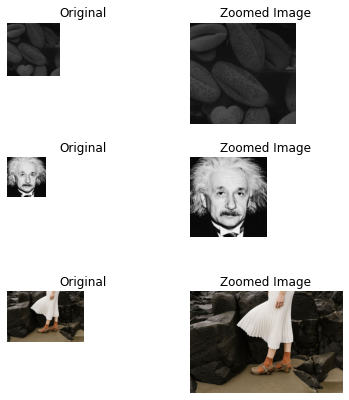

In [6]:
Scaling_Factor=2
def ScaledCods(i,j,scale):
    return int(i/scale),int(j/scale)
def Zoomed(image,Scaling_Factor):
    rows=image.shape[0]*Scaling_Factor
    cols=image.shape[1]*Scaling_Factor
    zoomed=np.zeros((rows,cols,3),image.dtype)
    for i in range(rows): 
        for j in range(cols):
            Scaled_i,Scaled_j=ScaledCods(i,j,Scaling_Factor)
            zoomed[i][j]=image[Scaled_i][Scaled_j]
    return zoomed
fig,ax = plt.subplots(3,2,figsize =[6, 7],sharey=True,sharex=True)
for i in range(3):
    if i==0:
        x='shells.png'
    elif i==1:
        x="einstein.png"
    else:
        x="highlights_and_shadows.jpg"
    original=cv.imread(x) 
    zoomed_image=Zoomed(original,Scaling_Factor)
    ax[i][0].imshow(cv.cvtColor(original,cv.COLOR_BGR2RGB))
    ax[i][1].imshow(cv.cvtColor(zoomed_image,cv.COLOR_BGR2RGB))
    ax[i][0].axis('off')
    ax[i][1].axis('off')
    ax[i][0].set_title('Original')
    ax[i][1].set_title('Zoomed Image')

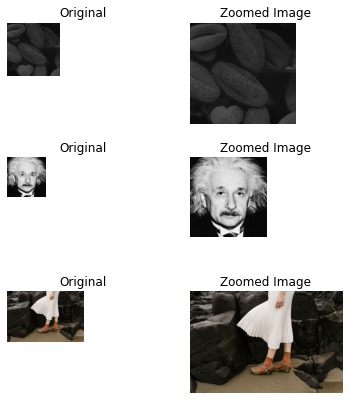

In [7]:
def bilinear_interpolation(image,Scaling_Factor):
    rows=int(image.shape[0]*Scaling_Factor)
    cols=int(image.shape[1]*Scaling_Factor)
    zoomed = cv.resize(image,(cols,rows),interpolation = cv.INTER_LINEAR)
    return zoomed
fig,ax = plt.subplots(3,2,figsize =[6, 7],sharey=True,sharex=True)
for i in range(3):
    if i==0:
        x='shells.png'
    elif i==1:
        x="einstein.png"
    else:
        x="highlights_and_shadows.jpg"
    original=cv.imread(x) 
    zoomed_image=bilinear_interpolation(original,Scaling_Factor)
    ax[i][0].imshow(cv.cvtColor(original,cv.COLOR_BGR2RGB))
    ax[i][1].imshow(cv.cvtColor(zoomed_image,cv.COLOR_BGR2RGB))
    ax[i][0].axis('off')
    ax[i][1].axis('off')
    ax[i][0].set_title('Original')
    ax[i][1].set_title('Zoomed Image')

Linear interpolation method takes more time to run the code than nearest-neighbor method to as it does more calculations in order to do the zooming. But the result image is more quality in bilinear method. 

$
\Huge Q6
$

Using builtin Function 'cv.sobel'

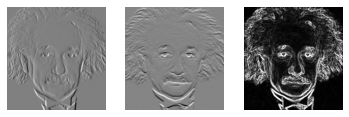

In [8]:
Einstein=cv.imread("einstein.png",cv.IMREAD_REDUCED_GRAYSCALE_2)
grad_x = cv.Sobel(Einstein, cv.CV_64F, 1, 0, ksize=3)
grad_y = cv.Sobel(Einstein, cv.CV_64F, 0, 1, ksize=3)
abs_grad_x = cv.convertScaleAbs(grad_x)
abs_grad_y = cv.convertScaleAbs(grad_y)
grad = cv.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)
fig,ax=plt.subplots(1,3,figsize=(6,2))
ax[0].imshow(grad_x,cmap='gray')
ax[1].imshow(grad_y,cmap='gray')
ax[2].imshow(grad,cmap='gray')
for p in range(3):
    ax[p].axis('off')

Using Filter2D function

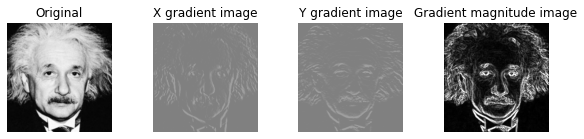

In [9]:
Einstein_p1=cv.imread("einstein.png",cv.IMREAD_REDUCED_GRAYSCALE_2)
kernel_x=np.array([(1,0,-1),(2,0,-2),(1,0,-1)])
kernel_y=np.array([(1,2,1),(0,0,0),(-1,-2,-1)])
x_im=cv.filter2D(Einstein_p1,-1,kernel_x)
y_im=cv.filter2D(Einstein_p1,-1,kernel_y)
Grad_mag=cv.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)
t00='Original'
t10='X gradient image'
t01='Y gradient image'
t11='Gradient magnitude image'
fig,ax=plt.subplots(1,4,figsize=(10,2))
ax[0].imshow(Einstein_p1,cmap='gray')
ax[1].imshow(x_im,cmap='gray',vmin=-1020,vmax=1020)
ax[2].imshow(y_im,cmap='gray',vmin=-1020,vmax=1020)
ax[3].imshow(Grad_mag,cmap='gray')
ax[0].set_title(t00)
ax[1].set_title(t10)
ax[2].set_title(t01)
ax[3].set_title(t11)
for p in range(4):
    ax[p].axis('off')

Using own convolusion function

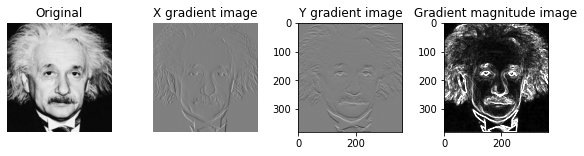

In [10]:
def convolve2D(img, kernel):
    row, col = np.shape(img)
    x, y = np.shape(kernel)
    img_pad =np.pad(img, ((x//2, x//2), (y//2, y//2)),'constant', constant_values=(0,0))
    img_con = np.zeros((np.shape(img)))
    for i in range(row):
        for j in range(col):
            img_con[i][j] =  np.sum(img_pad[i:i+x, j:j+y]*kernel)    
    return img_con    
Einstein_p2 = cv.imread('einstein.png',cv.IMREAD_GRAYSCALE).astype('float32')
sobel_h = np.array([(-1,-2,-1),(0,0,0),(1,2,1)],dtype=np.float32)
sobel_v = np.array([(-1,0,1),(-2,0,2),(-1,0,1)],dtype=np.float32)
x_im = convolve2D(Einstein_p2,sobel_v)
y_im = convolve2D(Einstein_p2,sobel_h)
grad_mag = np.sqrt(x_im**2 +y_im**2)
fig,ax = plt.subplots(1,4,figsize=(10,2))
ax[0].imshow(Einstein_p2,cmap='gray',vmin=0,vmax=255)
ax[1].imshow(x_im,cmap='gray',vmin=-1020,vmax=1020)
ax[2].imshow(y_im,cmap='gray',vmin=-1020,vmax=1020)
ax[3].imshow(grad_mag,cmap='gray',vmin=0,vmax=255)
ax[0].axis('off')
ax[1].axis('off')
ax[0].set_title("Original")
ax[1].set_title("X gradient image")
ax[2].set_title("Y gradient image")
ax[3].set_title("Gradient magnitude image")
plt.show()

Convolve in a nested way

Text(0.5, 1.0, 'Gradient magnitude image')

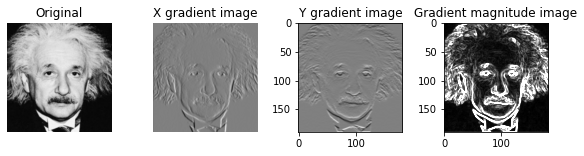

In [11]:
Einstein_p3=cv.imread("einstein.png",cv.IMREAD_REDUCED_GRAYSCALE_2)
sobel_h1 = np.array([[1],[2],[1]])
sobel_h2 = np.array([[1,0,-1]])
sobel_v1 = np.array([[1],[0],[-1]])
sobel_v2 = np.array([[1,2,1]])
y_im= convolve2D(Einstein_p3,sobel_h1)
yy_im= convolve2D(y_im , sobel_h2)
x_im= convolve2D(Einstein_p3,sobel_v1)
xx_im= convolve2D(x_im , sobel_v2)
grad_mag = np.sqrt(xx_im**2 + yy_im**2)
fig,ax = plt.subplots(1,4,figsize=(10,2))
ax[0].imshow(Einstein_p3,cmap='gray',vmin=0,vmax=255)
ax[1].imshow(yy_im,cmap='gray',vmin=-1020,vmax=1020)
ax[2].imshow(xx_im,cmap='gray',vmin=-1020,vmax=1020)
ax[3].imshow(grad_mag,cmap='gray',vmin=0,vmax=255)
ax[0].axis('off')
ax[1].axis('off')
ax[0].set_title("Original")
ax[1].set_title("X gradient image")
ax[2].set_title("Y gradient image")
ax[3].set_title("Gradient magnitude image")

Using builtin sobel function,filter2D and first convolve method gives lot more similar result than the last method. In the last method there are more thicker edges

$
\Huge Q7
$

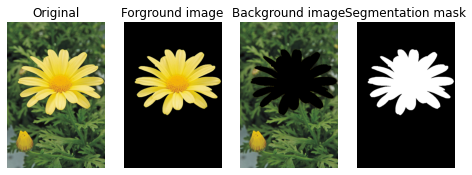

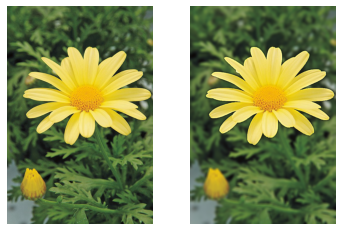

In [12]:
Sigma=20
im=cv.imread('daisy.jpg')
im1=cv.cvtColor(im,cv.COLOR_BGR2RGB)
mask=np.zeros(im1.shape[:2],np.uint8)
background=np.zeros((1,65),np.float64)
foreground=np.zeros((1,65),np.float64)
rect=(40,150,600,450)
(mask,background,foreground)=cv.grabCut(im1,mask,rect,background,foreground,5,cv.GC_INIT_WITH_RECT)
mask2 = np.where((mask==cv.GC_BGD)|(mask==cv.GC_PR_BGD),0,1).astype('uint8')
fmask = (mask == cv.GC_PR_FGD).astype("uint8") * 255
foreground_image = im1 * mask2[:, :, np.newaxis]
outMask = (np.where((mask == cv.GC_FGD) | (mask == cv.GC_PR_FGD), 0, 1)*255).astype(np.uint8)
background = cv.bitwise_and(im, im, mask=outMask) # Background Image
fig,ax = plt.subplots(1,4,figsize=(8,3))
ax[0].imshow(im1)
ax[1].imshow(foreground_image)
ax[2].imshow(cv.cvtColor(background,cv.COLOR_BGR2RGB))
ax[3].imshow(cv.cvtColor(fmask,cv.COLOR_BGR2RGB))
t0='Original'
t1='Forground image'
t2='Background image'
t3='Segmentation mask'
for p in range(4):
    ax[p].axis('off')
ax[0].set_title(t0)
ax[1].set_title(t1)
ax[2].set_title(t2)
ax[3].set_title(t3)
blured=cv.GaussianBlur(background,(11,11),Sigma)
enhanced = cv.add(cv.cvtColor(foreground_image,cv.COLOR_RGB2BGR), blured)
fig,ax = plt.subplots(1,2,figsize=(6,4))
ax[0].imshow(cv.cvtColor(im,cv.COLOR_BGR2RGB))
ax[1].imshow(cv.cvtColor(enhanced,cv.COLOR_BGR2RGB))
for p in range(2):
    ax[p].axis('off')

Q7) - c) When we gaussianBlur the image depend on the kernel size the background around the edges of foreground image become dark. If kernel size is larger more blur effect as well as the darkning happen.